## Vehicle Loan Database Project
##### This dataset provides a comprehensive overview of potential loan applicants' profiles, specifically tailored for the Indian demographic. It encapsulates a range of features, from basic demographics to financial details, that can be instrumental in assessing the creditworthiness of an individual
Dataset used in the project can be download here:https://www.kaggle.com/datasets/yashkmd/credit-profile-two-wheeler-loan-dataset

 #### Dataset Key Information :
  - Age ------------- Age of Apllicant
  - Gender ---------- Male / Female
  - Income ---------- Applicant income
  - Credit Score------Applicant creditworthiness
  - Credit History Length--credit accounts active
  - Number of Existing Loans --Applicant existing loans
  - LoanAmount ----------- Loan amount in thousands
  - Loan Tenure-------loan in months
  - Existing Customer--Active Customer
  - State  ------------State
  - City  -------------- City
  - LTV Ratio ---------- LTV Ratio
  - Employment Profile -- Employment Summary
  - Profile Score ------- rating & assessment Score
  - Occupation ---------- job category 
 #### Type of problem
This is a supervised classification machine learning problem

#### Import libraries

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
# Read the Excel file
df = pd.read_csv(r"C:\Users\hp\Desktop\GOMYCODE\GOMYCODE\credit_data.csv")
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [109]:
# Make a copy of the original dataframe
df1 = df.copy()

### Data Exploration

In [110]:
# Checking for null values
df1.isna().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

In [111]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
279851     True
279852    False
279853     True
279854     True
279855    False
Length: 279856, dtype: bool

In [112]:
print(df1.dtypes)

Age                           int64
Gender                       object
Income                        int64
Credit Score                  int64
Credit History Length         int64
Number of Existing Loans      int64
Loan Amount                   int64
Loan Tenure                   int64
Existing Customer            object
State                        object
City                         object
LTV Ratio                   float64
Employment Profile           object
Profile Score                 int64
Occupation                   object
dtype: object


In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

### Data Cleaning

In [114]:
# change columns names to lowercase
def change_column_name(col):
    return col.lower()

In [115]:
header = []
for col in df1.columns:
    new_header = header.append(col.lower())
df1.columns = header

In [116]:
df1 = pd.DataFrame(df1)

# List of columns to drop
columns_to_drop = ['existing customer', 'state', 'city', 'employment profile', 'occupation']


#Drop the specified columns
df1 = df1.drop(columns=columns_to_drop)

# Print the remaining columns
print("Remaining columns in the DataFrame:")
print(df1.columns)

Remaining columns in the DataFrame:
Index(['age', 'gender', 'income', 'credit score', 'credit history length',
       'number of existing loans', 'loan amount', 'loan tenure', 'ltv ratio',
       'profile score'],
      dtype='object')


In [117]:
# Rename selected column names
df1 = df1.rename(columns={
    "age": "age",
    "gender": "gender",
    "income": "income",
    "credit score": "credit_score",
    "credit history length": "credit_history_length",
    "number of existing loans": "number_existing_loans",
    "loan amount": "loan_amount",
    "loan tenure": "loan_tenure",
    "ltv ratio": "ltv_ratio",
    "profile score": "profile_score",
})

In [118]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'gender' column
df1['gender'] = label_encoder.fit_transform(df1['gender'])

In [119]:
df1.head()

,age,gender,income,credit_score,credit_history_length,number_existing_loans,loan_amount,loan_tenure,ltv_ratio,profile_score
0,31,1,36000,604,487,5,109373,221,90.943430,77
1,25,1,50000,447,386,2,150000,89,91.135253,43
2,62,2,178000,850,503,10,69099,110,40.000000,90
3,69,0,46000,668,349,6,150000,148,87.393365,86
4,52,1,132000,601,553,5,150000,157,66.158757,90


In [120]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
279851     True
279852    False
279853     True
279854     True
279855    False
Length: 279856, dtype: bool

In [121]:
# Remove duplicate rows
df_cleaned = df1.drop_duplicates()

In [122]:
# Display the cleaned DataFrame
df1 = df_cleaned

In [123]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
279844    False
279847    False
279850    False
279852    False
279855    False
Length: 179042, dtype: bool

In [124]:
numerical_cols = df1.select_dtypes("number").columns
numerical_cols

Index(['age', 'gender', 'income', 'credit_score', 'credit_history_length',
       'number_existing_loans', 'loan_amount', 'loan_tenure', 'ltv_ratio',
       'profile_score'],
      dtype='object')

In [125]:

# so we might consider profile_score has a feature that will determine loan eligibility
df1.corr()["profile_score"].sort_values(ascending= False)

profile_score            1.000000
credit_score             0.775678
number_existing_loans    0.764236
loan_tenure              0.491211
income                   0.183031
age                      0.104616
loan_amount              0.069123
credit_history_length    0.001421
gender                  -0.000055
ltv_ratio               -0.543069
Name: profile_score, dtype: float64

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179042 entries, 0 to 279855
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    179042 non-null  int64  
 1   gender                 179042 non-null  int32  
 2   income                 179042 non-null  int64  
 3   credit_score           179042 non-null  int64  
 4   credit_history_length  179042 non-null  int64  
 5   number_existing_loans  179042 non-null  int64  
 6   loan_amount            179042 non-null  int64  
 7   loan_tenure            179042 non-null  int64  
 8   ltv_ratio              179042 non-null  float64
 9   profile_score          179042 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 14.3 MB


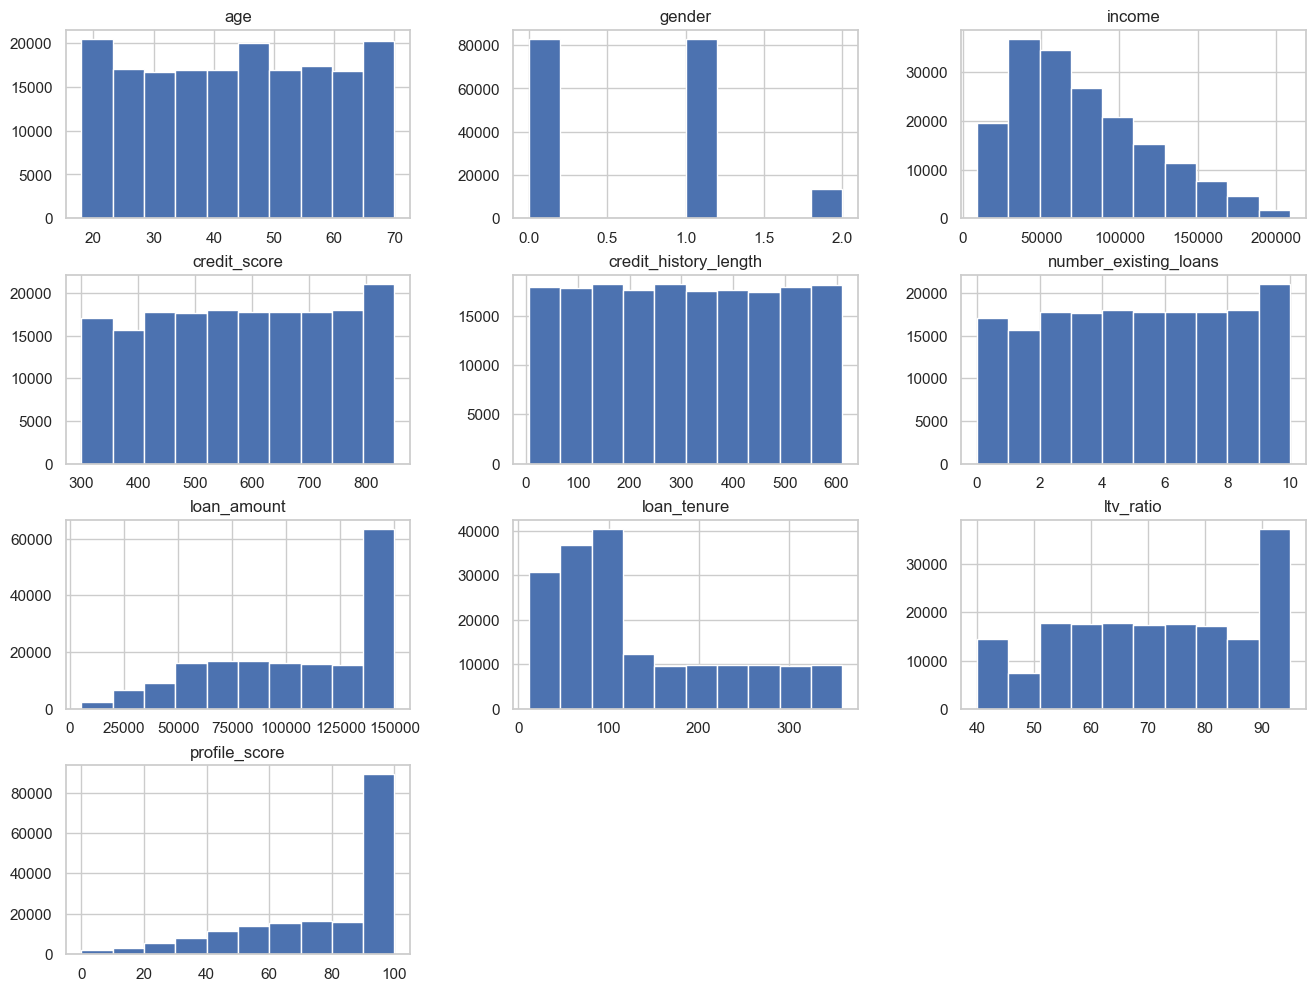

In [127]:
# the dataframe.describe has indicated that there might be extreme values in those columns, we can still explore this further
df1[numerical_cols].hist(figsize=(16, 12)); #this used to see the distribution

In [128]:
#Checking the SKEW COLUMS graphically 
skewed_cols = ["profile_score", "credit_score", "number_existing_loans", "loan_tenure", "income", "age "]

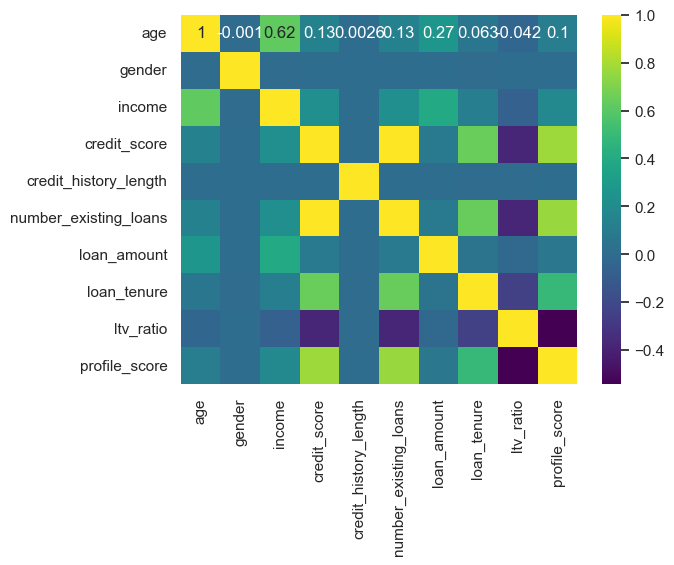

In [129]:
#correlation with applicant .  
sns.heatmap(data=df1.corr(), cmap="viridis", annot=True);

In [130]:
# Checking for outliers in the dataset (ALWAYS USe this code to resolve ur outlier issues)
def outliers_func():
        outliers_cols = []
    
        for col in df1.select_dtypes("number"): 
            q1 = df1[col].quantile(.25)
            q3 = df1[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df1[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df1[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols

In [131]:
# calling the outliers function
outlier_columns = outliers_func()

In [132]:
outlier_columns

['income', 'profile_score']

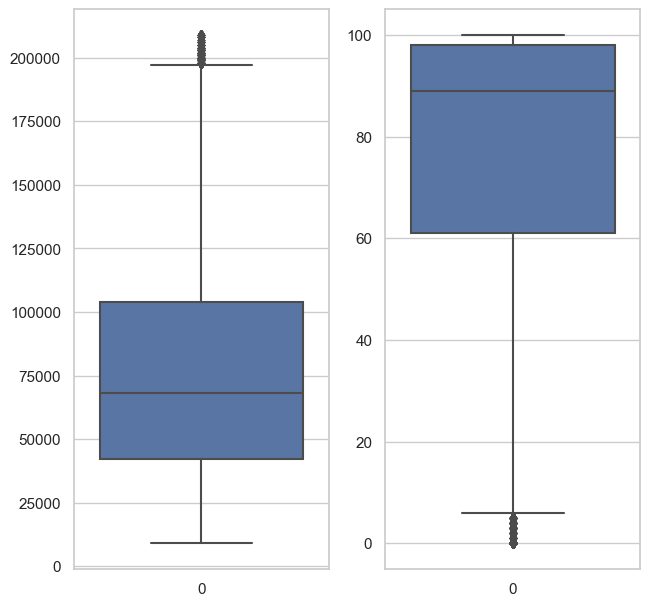

In [133]:
# Visualizing the boxplot for the columns with outliers

plt.figure(figsize=(16,12))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(df1[col])
plt.tight_layout()
plt.show()

In [134]:
df1.profile_score.unique()

array([ 77,  43,  90,  86,  92,  25,  58, 100,  87,  13,  95,  49,  82,
        78,  75,  15,  98,  74,  88,  23,  83,  79,  96,  62,  85,  52,
        46,  72,  17,  19,  94,  44,  29,  91,  68,  42,  56,  97,  37,
        99,  47,  70,  54,  73,  32,  31,  69,  63,   0,  65,  33,  93,
        10,  66,  60,  81,  35,  64,  34,  67,  24,  71,  61,  20,  41,
        50,  48,  80,  16,   8,  30,  12,  55,  22,  59,  89,  51,  27,
        45,  38,  39,  76,   2,  18,  57,  53,  40,  11,  84,  14,  28,
         3,  26,   5,  36,   6,   9,  21,   4,   7,   1], dtype=int64)

In [135]:
outlier_col = ['income']

### Data preprocessing Stage

In [136]:
# Transforming the skewed columns
df1[outlier_col] = df1[outlier_col].apply(lambda x: np.log(x + 1))

In [137]:
df1.shape

(179042, 10)

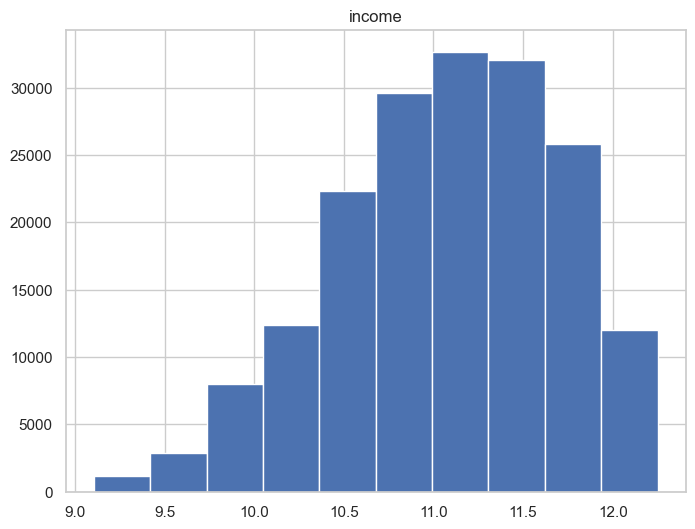

In [138]:
# The figure below shows that the columns have been transformed nicely
df1[outlier_col].hist(figsize=(8, 6));

In [139]:
df1

,age,gender,income,credit_score,credit_history_length,number_existing_loans,loan_amount,loan_tenure,ltv_ratio,profile_score
0,31,1,10.491302,604,487,5,109373,221,90.943430,77
1,25,1,10.819798,447,386,2,150000,89,91.135253,43
2,62,2,12.089544,850,503,10,69099,110,40.000000,90
3,69,0,10.736418,668,349,6,150000,148,87.393365,86
4,52,1,11.790565,601,553,5,150000,157,66.158757,90
...,...,...,...,...,...,...,...,...,...,...
279844,25,0,11.112463,412,503,2,150000,56,71.237639,55
279847,70,1,11.970357,621,277,5,94575,329,68.763160,95
279850,53,0,11.251574,467,268,3,115186,76,60.563183,71
279852,45,0,11.728045,850,476,10,80341,86,78.960607,91


In [140]:
def profile_score(col):
    if col >= 50:
        return 1
    else:
        return 0

In [141]:
df1.profile_score.apply(profile_score)

0         1
1         0
2         1
3         1
4         1
         ..
279844    1
279847    1
279850    1
279852    1
279855    1
Name: profile_score, Length: 179042, dtype: int64

In [142]:
df1["Eligibilty_score"] = df1.profile_score.apply(profile_score)

In [143]:
df1

,age,gender,income,credit_score,credit_history_length,number_existing_loans,loan_amount,loan_tenure,ltv_ratio,profile_score,Eligibilty_score
0,31,1,10.491302,604,487,5,109373,221,90.943430,77,1
1,25,1,10.819798,447,386,2,150000,89,91.135253,43,0
2,62,2,12.089544,850,503,10,69099,110,40.000000,90,1
3,69,0,10.736418,668,349,6,150000,148,87.393365,86,1
4,52,1,11.790565,601,553,5,150000,157,66.158757,90,1
...,...,...,...,...,...,...,...,...,...,...,...
279844,25,0,11.112463,412,503,2,150000,56,71.237639,55,1
279847,70,1,11.970357,621,277,5,94575,329,68.763160,95,1
279850,53,0,11.251574,467,268,3,115186,76,60.563183,71,1
279852,45,0,11.728045,850,476,10,80341,86,78.960607,91,1


In [144]:
#This show the number of client Eligible for loan application
df1.Eligibilty_score.value_counts()

Eligibilty_score
1    150076
0     28966
Name: count, dtype: int64

In [146]:
df1

,age,gender,income,credit_score,credit_history_length,number_existing_loans,loan_amount,loan_tenure,ltv_ratio,profile_score,Eligibilty_score
0,31,1,10.491302,604,487,5,109373,221,90.943430,77,1
1,25,1,10.819798,447,386,2,150000,89,91.135253,43,0
2,62,2,12.089544,850,503,10,69099,110,40.000000,90,1
3,69,0,10.736418,668,349,6,150000,148,87.393365,86,1
4,52,1,11.790565,601,553,5,150000,157,66.158757,90,1
...,...,...,...,...,...,...,...,...,...,...,...
279844,25,0,11.112463,412,503,2,150000,56,71.237639,55,1
279847,70,1,11.970357,621,277,5,94575,329,68.763160,95,1
279850,53,0,11.251574,467,268,3,115186,76,60.563183,71,1
279852,45,0,11.728045,850,476,10,80341,86,78.960607,91,1


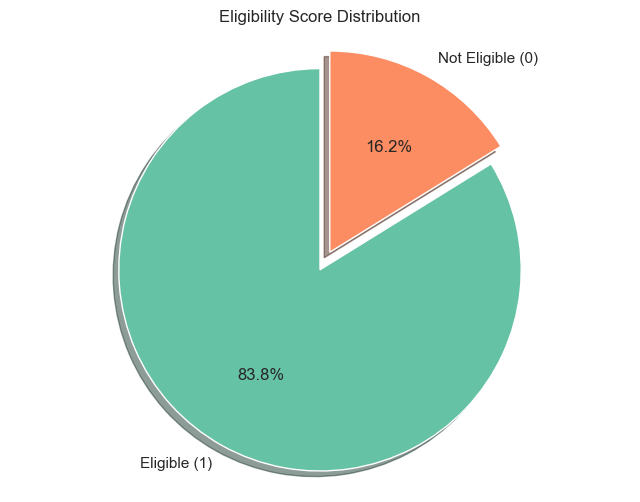

In [147]:
# Data for the pie chart
labels = ['Eligible (1)', 'Not Eligible (0)']
sizes = [150076, 28966]
colors = ['#66c2a5', '#fc8d62']  # Custom colors for the pie chart
explode = (0.1, 0)  # Explode the first slice (Eligible)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie chart is circular
plt.axis('equal')  
plt.title('Eligibility Score Distribution')
plt.show()

In [148]:
df1

,age,gender,income,credit_score,credit_history_length,number_existing_loans,loan_amount,loan_tenure,ltv_ratio,profile_score,Eligibilty_score
0,31,1,10.491302,604,487,5,109373,221,90.943430,77,1
1,25,1,10.819798,447,386,2,150000,89,91.135253,43,0
2,62,2,12.089544,850,503,10,69099,110,40.000000,90,1
3,69,0,10.736418,668,349,6,150000,148,87.393365,86,1
4,52,1,11.790565,601,553,5,150000,157,66.158757,90,1
...,...,...,...,...,...,...,...,...,...,...,...
279844,25,0,11.112463,412,503,2,150000,56,71.237639,55,1
279847,70,1,11.970357,621,277,5,94575,329,68.763160,95,1
279850,53,0,11.251574,467,268,3,115186,76,60.563183,71,1
279852,45,0,11.728045,850,476,10,80341,86,78.960607,91,1


In [149]:
df1.shape

(179042, 11)

## Modelling

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [151]:
# LogisticRegression?

In [152]:
df1

,age,gender,income,credit_score,credit_history_length,number_existing_loans,loan_amount,loan_tenure,ltv_ratio,profile_score,Eligibilty_score
0,31,1,10.491302,604,487,5,109373,221,90.943430,77,1
1,25,1,10.819798,447,386,2,150000,89,91.135253,43,0
2,62,2,12.089544,850,503,10,69099,110,40.000000,90,1
3,69,0,10.736418,668,349,6,150000,148,87.393365,86,1
4,52,1,11.790565,601,553,5,150000,157,66.158757,90,1
...,...,...,...,...,...,...,...,...,...,...,...
279844,25,0,11.112463,412,503,2,150000,56,71.237639,55,1
279847,70,1,11.970357,621,277,5,94575,329,68.763160,95,1
279850,53,0,11.251574,467,268,3,115186,76,60.563183,71,1
279852,45,0,11.728045,850,476,10,80341,86,78.960607,91,1


In [153]:
data = df1.sample(n=50000)

In [154]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['age', 'gender', 'income', 'credit_score', 'credit_history_length',
       'number_existing_loans', 'loan_amount', 'loan_tenure', 'ltv_ratio',
       'profile_score', 'Eligibilty_score'],
      dtype='object')


In [155]:
data.corr()["Eligibilty_score"]

age                      0.085758
gender                  -0.004570
income                   0.140141
credit_score             0.546454
credit_history_length    0.009358
number_existing_loans    0.534724
loan_amount              0.051638
loan_tenure              0.309710
ltv_ratio               -0.374853
profile_score            0.797171
Eligibilty_score         1.000000
Name: Eligibilty_score, dtype: float64

In [156]:
data = data.drop(columns=["credit_history_length", "ltv_ratio", "gender"], axis=1)

In [157]:
data

,age,income,credit_score,number_existing_loans,loan_amount,loan_tenure,profile_score,Eligibilty_score
238386,67,11.989166,850,10,150000,260,100,1
156642,58,11.891369,850,10,148064,326,99,1
157573,23,10.839601,677,6,150000,95,97,1
69498,46,10.968216,300,0,63280,55,45,0
145444,34,10.691968,323,0,59307,101,45,0
...,...,...,...,...,...,...,...,...
242063,43,11.211834,538,4,107327,55,93,1
164012,68,11.225257,552,4,143608,81,71,1
277856,26,11.198228,620,5,107250,318,77,1
92663,50,10.491302,300,0,88096,64,0,0


In [158]:
# split dataset into training and testing data
target = data["Eligibilty_score"]
predictor_variables = data.drop("Eligibilty_score", axis=1)

In [159]:
target

238386    1
156642    1
157573    1
69498     0
145444    0
         ..
242063    1
164012    1
277856    1
92663     0
165099    1
Name: Eligibilty_score, Length: 50000, dtype: int64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target, test_size= 0.2, random_state= 42)

In [161]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40000, 7) (10000, 7)
(40000,) (10000,)


In [162]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [163]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, X_test, y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(X_test)
        training_accuracy = accuracy_score(training_predict, y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores

In [164]:
# The logistic Regression and the SVC(support Vector Classifier) perform better among the models
fit_predict_and_score(models, X_train, X_test, y_train, y_test)

{'Logistic Regression': ' has a  score of 0.978775 on training set and a score of 0.9779 on testing set',
 'DecisionTree Classifier': ' has a  score of 1.0 on training set and a score of 1.0 on testing set',
 'Random Forest': ' has a  score of 1.0 on training set and a score of 1.0 on testing set',
 'SVC': ' has a  score of 0.83865 on training set and a score of 0.834 on testing set'}

In [165]:
for name, model in models.items():
    print(model.fit(X_train, y_train))
    print(model.score(X_train, y_train))

LogisticRegression(solver='liblinear')
0.978775
DecisionTreeClassifier()
1.0
RandomForestClassifier()
1.0
SVC()
0.83865


### Evaluating model performance
I evaluated the performance of the two models (DecisionTree & RandomForest Classifier) that have better score on the test dataset

In [166]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rand = RandomForestClassifier()
rand.fit(X_train, y_train)
rand_prediction = rand.predict(X_test)

In [167]:
rand_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
rand_score = cross_val_score(rand, X_train, y_train, cv = 5, scoring = "accuracy")

In [93]:
np.mean(rand_score)

1.0

In [94]:
# Classification report
print(classification_report(y_test, rand_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1679
           1       1.00      1.00      1.00      8321

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Saving the trained model

In [95]:
import pickle

In [96]:
filename = "Vehicle Loan Database Project.sav"
pickle.dump(rand, open(filename, "wb"))

## Streamlit & deployment

In [97]:
X_test.columns

Index(['age', 'income', 'credit_score', 'number_existing_loans', 'loan_amount',
       'loan_tenure', 'profile_score'],
      dtype='object')

In [168]:
row_index = 7

# Convert to a list and print without column names
row_values = X_test.iloc[row_index].tolist()
print(row_values)

[65.0, 11.944714374881176, 838.0, 9.0, 67702.0, 112.0, 99.0]


In [169]:
input_data = ([65.0, 11.944714374881176, 838.0, 9.0, 67702.0, 112.0, 99.0])

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rand.predict(input_data_reshaped)

if prediction[0] == 0:
    print("Unlikely to be issued vehicle loan")
else:
    print("Likely to issued vehicle loan")

Likely to issued vehicle loan


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#deployment
import streamlit as st
import numpy as np
import pickle

# Load the model (assuming you have a pickled model file named 'rand_model.pkl')
with open('Vehicle Loan Database Project.sav', 'rb') as file:
    rand = pickle.load(file)

# Define the prediction function
def predict_vehicle_loan(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = rand.predict(input_data_reshaped)
    return prediction[0]

# Streamlit app
st.title("Vehicle Loan Prediction")

st.header("Enter the details below to predict the likelihood of being issued a vehicle loan:")

# Create input fields
age = st.number_input("Age", min_value=18, max_value=100, value=65)
income = st.number_input("Income", min_value=0.0, value=11.944714374881176)
credit_score = st.number_input("Credit Score", min_value=300, max_value=850, value=838)
number_existing_loans = st.number_input("Number of Existing Loans", min_value=0, value=9)
loan_amount = st.number_input("Loan Amount", min_value=0.0, value=67702.0)
loan_tenure = st.number_input("Loan Tenure (in months)", min_value=1, value=112)
profile_score = st.number_input("Profile Score", min_value=0, max_value=100, value=99)

# Predict button
if st.button("Predict"):
    input_data = [age, income, credit_score, number_existing_loans, loan_amount, loan_tenure, profile_score]
    prediction = predict_vehicle_loan(input_data)

    if prediction == 0:
        st.error("Unlikely to be issued a vehicle loan")
    else:
        st.success("Likely to be issued a vehicle loan")